<a href="https://colab.research.google.com/github/Fuhui-Chen/Fastbook-Practice/blob/master/01_intro_fir%26sec_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install fastai2

     |████████████████████████████████| 194kB 3.4MB/s 


In [0]:

#id first_training（training a state-of-the-art model for recognizing cats versus dogs）
#caption Results from the first training
# CLICK ME
from fastai2.vision.all import * #imports all of the fastai.vision library
path = untar_data(URLs.PETS)/'images' 
#downloads a standard dataset from the fast.ai datasets collection (if not previously downloaded) to your server, extracts it ， and returns a Path object with the extracted location
def is_cat(x): return x[0].isupper()
#define a function, is_cat, labels cats based on a filename rule provided by the dataset creators
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
#use that function，which tells fastai what kind of dataset we have, and how it is structured
learn = cnn_learner(dls, resnet34, metrics=error_rate)
# training our image recognizer tells fastai to create a convolutional neural network (CNN) and specifies what architecture to use (i.e. what kind of model to create), what data we want to train it on, and what metric to use:
learn.fine_tune(1)
#tells fastai how to fit the model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.172585,0.014405,0.005413,34:13


epoch,train_loss,valid_loss,error_rate,time
0,0.051183,0.016757,0.005413,49:45


In [0]:

#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['/chapter1_cat_example.jpg'])
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [0]:
uploader = SimpleNamespace(data = ['/dog1.jpg'])
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000364


In [0]:
#id second_training(train a segmentation model )
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.830720,2.442081,01:11


epoch,train_loss,valid_loss,time
0,1.881339,1.467258,01:19
1,1.624813,1.299148,01:18
2,1.476940,1.107580,01:18
3,1.325139,0.924036,01:19
4,1.180478,0.758101,01:17
5,1.060088,0.708002,01:18
6,0.963709,0.705790,01:18
7,0.889334,0.692457,01:18


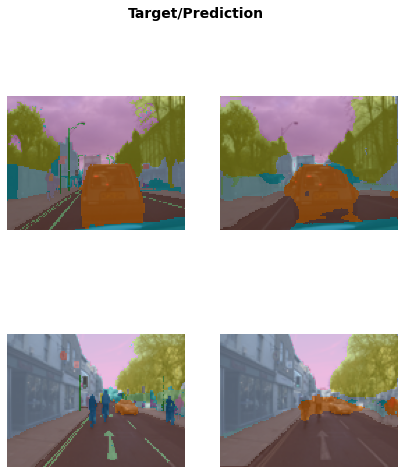

In [0]:
learn.show_results(max_n=6, figsize=(7,8))